In [22]:
from astropy.table import Table
from scipy.interpolate import interp1d
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
table = Table.read("ch2_xsm_20201027_v1_level2.lc")

In [24]:
print(table)

       TIME          RATE     ERROR   FRACEXP
        s           ct / s   counts/s        
----------------- --------- --------- -------
120580187.4946621  815.5735 28.558247     1.0
120580188.4946621   828.258 28.779472     1.0
120580189.4946621   823.313 28.693432     1.0
120580190.4946621 800.01996 28.284624     1.0
120580191.4946621 904.12994 30.068754     1.0
120580192.4946621 852.59546 29.199238     1.0
120580193.4946621 805.85034 28.387503     1.0
120580194.4946621  823.5242 28.697111     1.0
120580195.4946621 836.10425 28.915468     1.0
120580196.4946621 866.47504 29.435947     1.0
              ...       ...       ...     ...
120601186.4946621  432.3281 20.792501     1.0
120601187.4946621 488.42206 22.100273     1.0
120601188.4946621 437.38513 20.913755     1.0
120601189.4946621 458.80878 21.419823     1.0
120601190.4946621 445.91922   21.1168     1.0
120601191.4946621 427.59357 20.678335     1.0
120601192.4946621 453.70615 21.300379     1.0
120601193.4946621 533.88196 23.105

In [25]:
time = table["TIME"]
rate = table["RATE"]
print(time)
print(rate)

       TIME      
        s        
-----------------
120580187.4946621
120580188.4946621
120580189.4946621
120580190.4946621
120580191.4946621
120580192.4946621
120580193.4946621
120580194.4946621
120580195.4946621
120580196.4946621
              ...
120601186.4946621
120601187.4946621
120601188.4946621
120601189.4946621
120601190.4946621
120601191.4946621
120601192.4946621
120601193.4946621
120601194.4946621
120601195.4946621
Length = 13400 rows
   RATE  
  ct / s 
---------
 815.5735
  828.258
  823.313
800.01996
904.12994
852.59546
805.85034
 823.5242
836.10425
866.47504
      ...
 432.3281
488.42206
437.38513
458.80878
445.91922
427.59357
453.70615
533.88196
 519.5328
475.36896
Length = 13400 rows


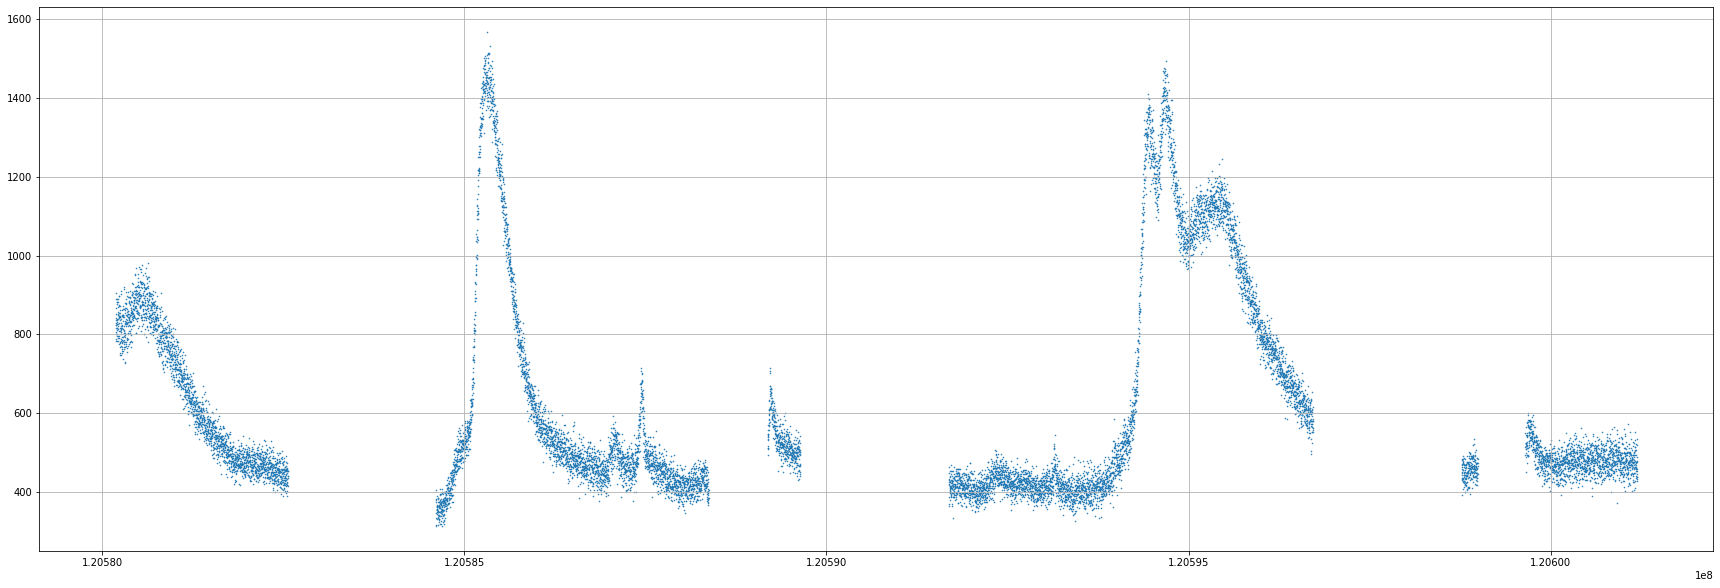

In [26]:
plt.figure(figsize = (30,10))
plt.scatter(time,rate,s=0.3)
plt.grid()
plt.show()


In [27]:
print(time)

       TIME      
        s        
-----------------
120580187.4946621
120580188.4946621
120580189.4946621
120580190.4946621
120580191.4946621
120580192.4946621
120580193.4946621
120580194.4946621
120580195.4946621
120580196.4946621
              ...
120601186.4946621
120601187.4946621
120601188.4946621
120601189.4946621
120601190.4946621
120601191.4946621
120601192.4946621
120601193.4946621
120601194.4946621
120601195.4946621
Length = 13400 rows


In [28]:
time = [int(i -time[0]) for i in time]

In [29]:

for i in range(len(time) -1 ):
    if(time[i+1] - time[i] >1):
        print(time[i+1] -time[i])

2044
813
2049
2052
656


In [30]:
t1 = []
r1 =[]
for i in range(len(time)-1):
    t1.append(time[i])
    r1.append(rate[i])
    if(time[i+1] - time[i] == 2):
        t1.append(time[i]+1)
        r1.append((rate[i]+rate[i+1])/2)



In [31]:
for i in range(len(t1) -1 ):
    if(t1[i+1] - t1[i] >1):
        print(t1[i+1] -t1[i])

2044
813
2049
2052
656


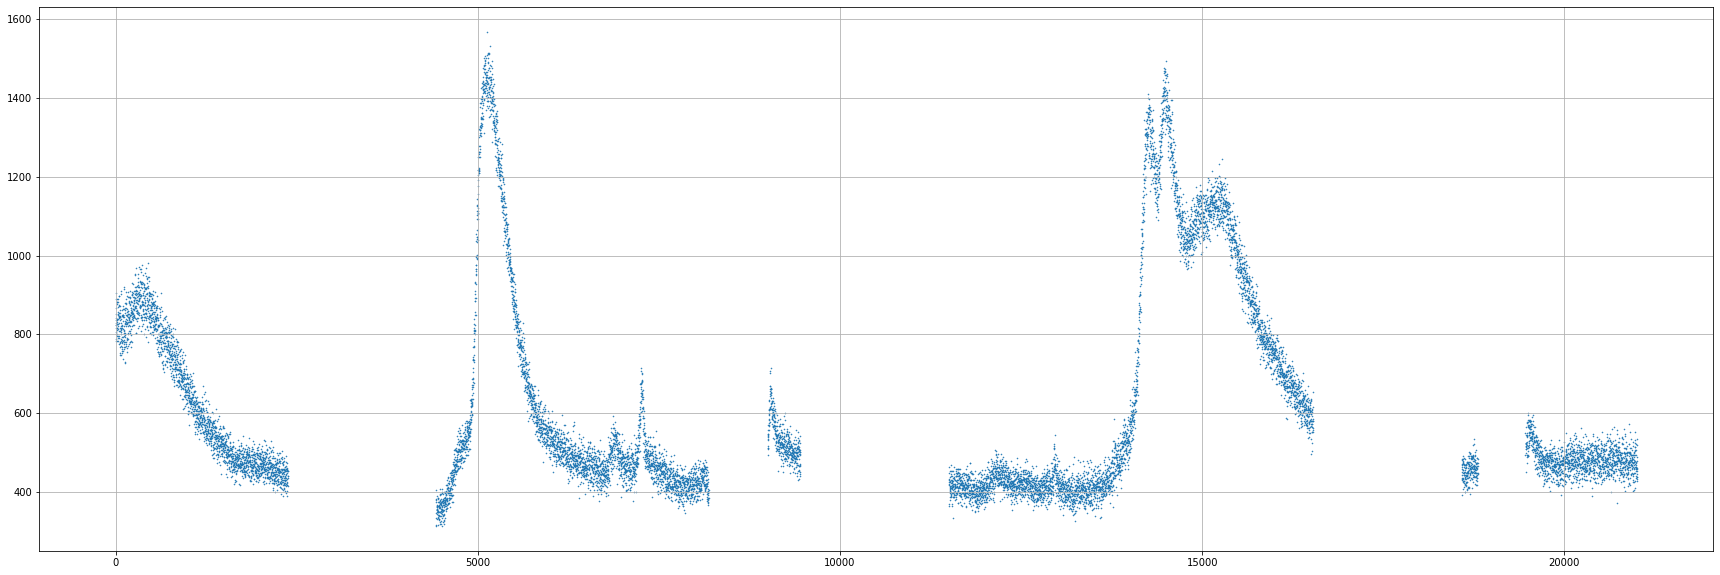

In [32]:
plt.figure(figsize = (30,10))
plt.scatter(t1,r1,0.3)
plt.grid()
plt.show()

In [33]:
s =[]
e =[]
s.append(0)
for i in range(1,len(t1)):
    if(t1[i] - t1[i-1] >1):
        e.append(i)
        s.append(i)
e.append(len(t1))
print(len(s),len(e))
e


6 6


[2380, 6145, 6600, 11628, 11852, 13399]

In [34]:
print(s)

[0, 2380, 6145, 6600, 11628, 11852]


In [35]:
t_dash =[]
r_dash =[]
for i in range(len(s)):
    x=[]
    y=[]
    for j in range(s[i],e[i]):
        x.append(t1[j])
        y.append(r1[j])
    t_dash.append(x)
    r_dash.append(y)

print(len(t_dash),len(r_dash))



6 6


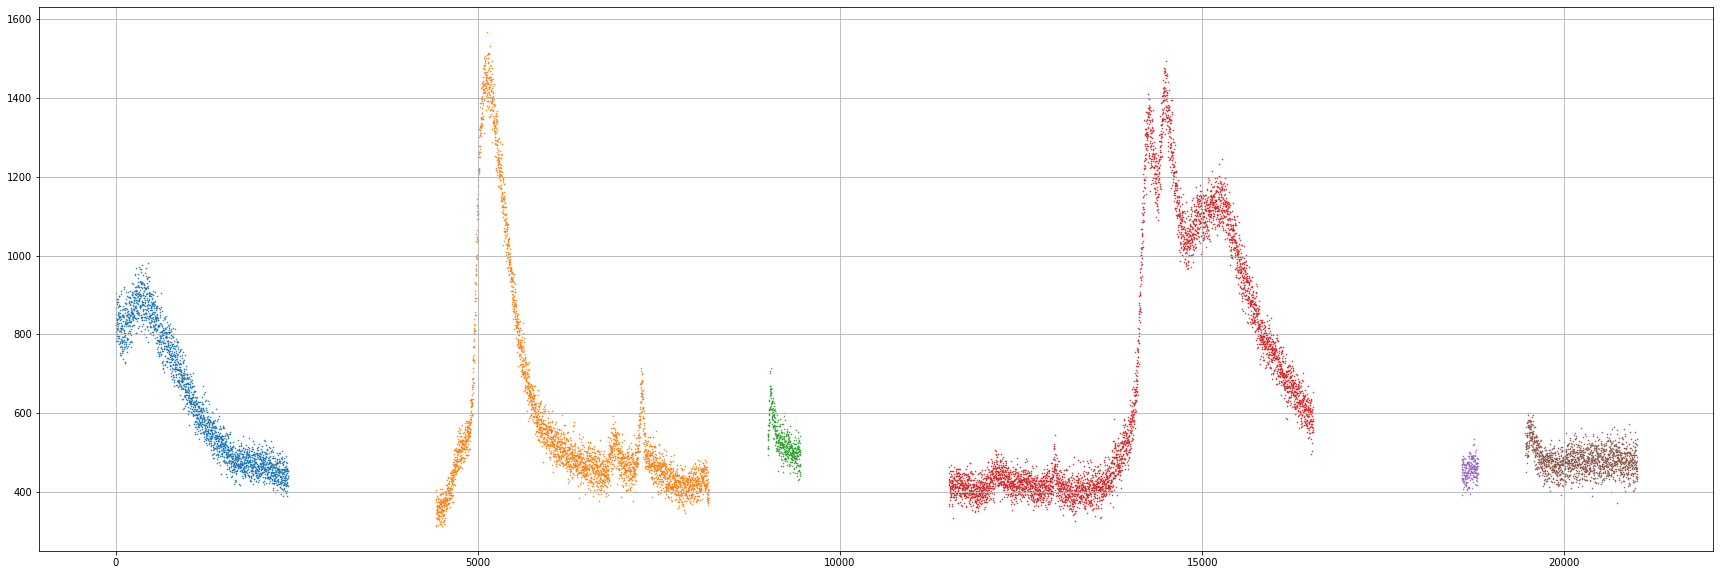

In [36]:
plt.figure(figsize=(30,10))
for i in range(len(t_dash)):
    plt.scatter(t_dash[i],r_dash[i],s = 0.3)
plt.grid()
plt.show()


In [37]:
t3=[]
r3=[]
for i in range (len(t_dash)):
    x=t_dash[i]
    y=r_dash[i]
    if(len(x)>=240):
        w_size=int(240/(1+np.exp(-(len(x)-240))))
        shift=w_size//2
        norm=[]
        norm_dp=[]
        norm_dp.append(np.mean(y[0:w_size]))
        norm.append(x[0])
        for j in range(w_size,len(y),shift):
            norm_dp.append(np.mean(y[j:j+shift]))
            norm.append(x[j])
        norm_dp=np.array(norm_dp)
        norm=np.array(norm)
        x_new=np.linspace(x[0],x[0]+len(x),x[0]+len(x))
        func=interp1d(norm,norm_dp, fill_value='extrapolate',kind='linear')   
        y_new=func(x_new)
        t3.append(x_new)
        r3.append(y_new) 
        
    


In [38]:
print(len(t3))
print(len(r3))

5
5


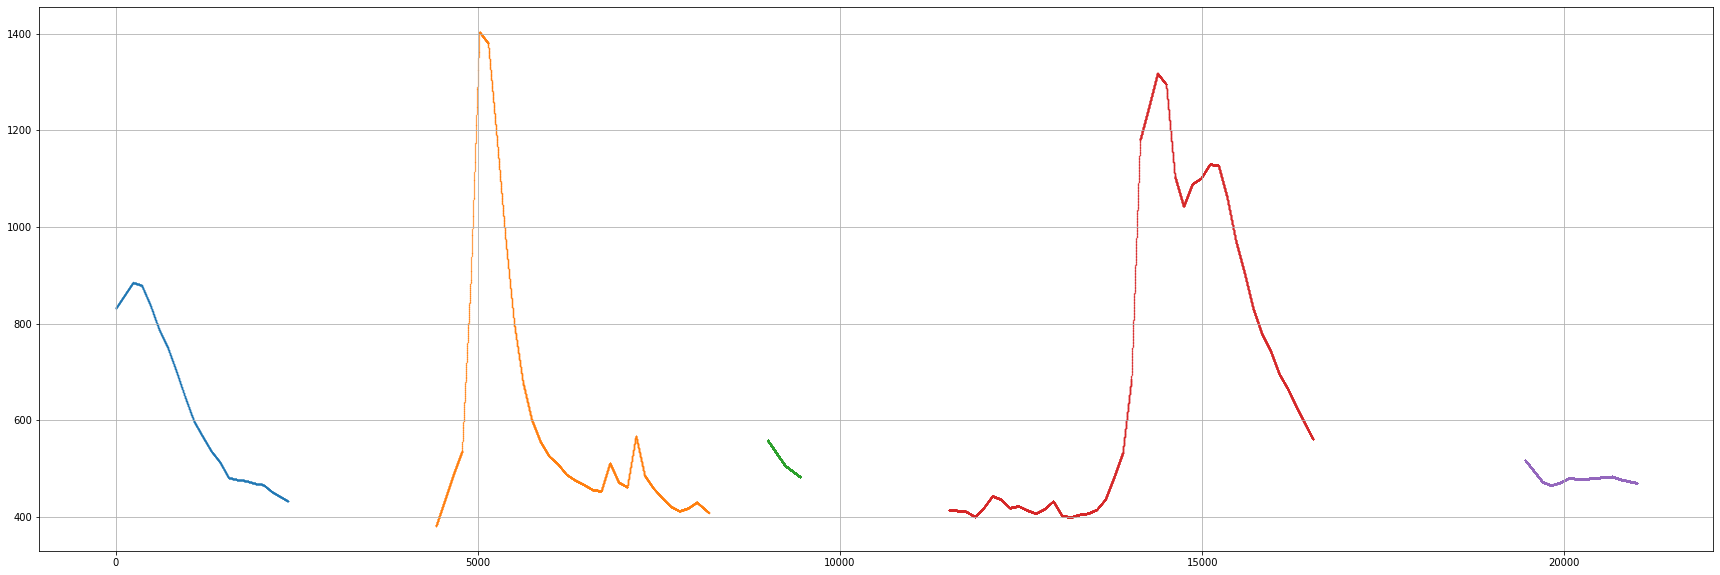

In [39]:
plt.figure(figsize=(30,10))
for i in range(len(t3)):
    plt.scatter(t3[i],r3[i],s = 0.1)
plt.grid()
plt.show()

In [40]:
x_interp=[]
y_interp=[]
for i in range(len(t3)):
    for j in range(len(t3[i])):
        x_interp.append(t3[i][j])
        y_interp.append(r3[i][j])
final_time=np.linspace(int(x_interp[0]),int(x_interp[-1]+x_interp[0]),int(x_interp[-1]-x_interp[0]))
f=interp1d(x_interp,y_interp, fill_value='extrapolate',kind='linear')
final_rate=f(final_time)  

        

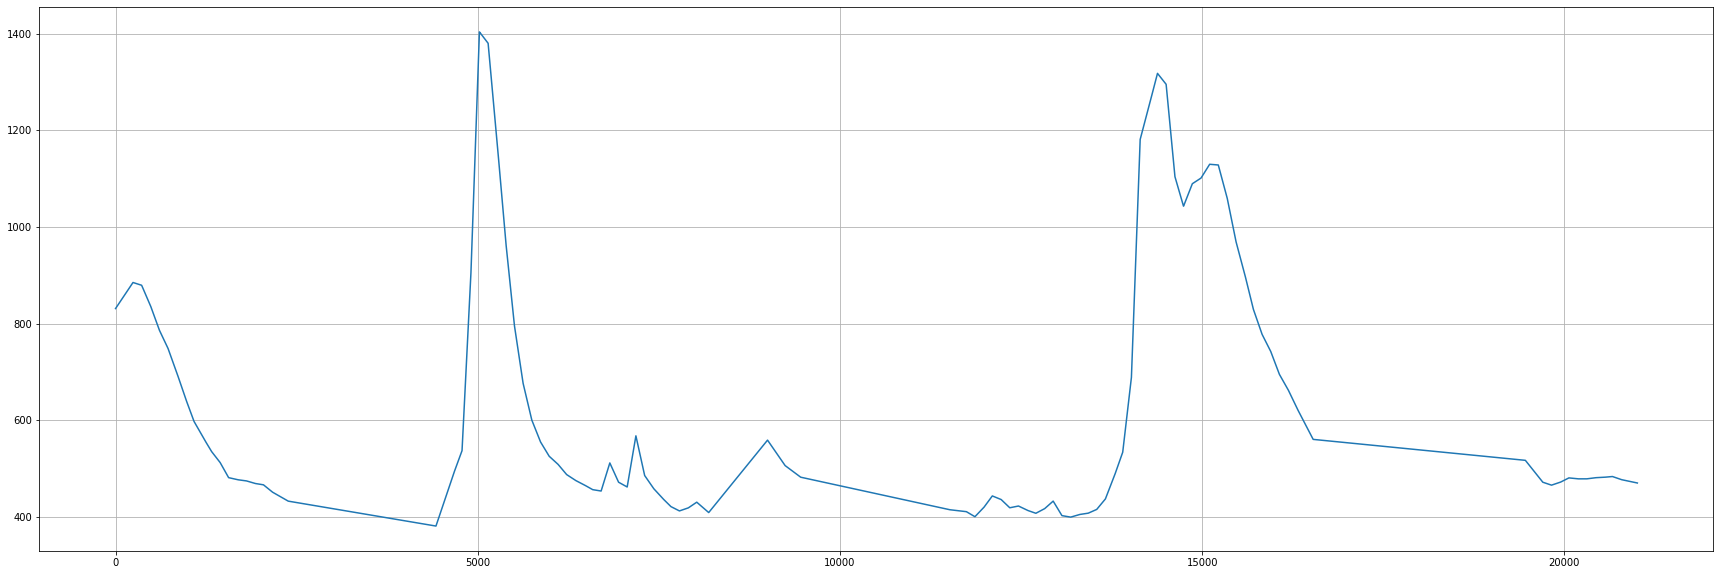

In [41]:
plt.figure(figsize=(30,10))
plt.plot(final_time,final_rate)
plt.grid()
plt.show()